<a href="https://colab.research.google.com/github/javier-jaime/Route-Recommender/blob/main/3PL__EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA and Feature Engineering

## Data Preparation

Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np

from google.colab import drive
from google.colab import files

# from sklearn.cluster import KMeans # Uncomment if required

In [ ]:
# Mount Google Drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read dataset from excel in Google Drive to Pandas Data Frame
data = pd.read_excel('drive/MyDrive/Colab Data/3PL_2020_W.xlsx')
print(data.shape)
data.set_index('Lean ID', inplace=True)

(9053, 30)


In [ ]:
data

,Tender Date,First Pick Calculated Date,First Pick Location City,Last Drop Calculated Date,Last Drop Location Name,Last Drop Location Reference Number,Last Drop Location City,Last Drop State/Province,Total Distance (km),Weight (kg),...,Last Drop Original Plan Date Start,Last Drop Appt Start Date,Fiscal Period - Primary Date,Load Group,Shipper Load Number,Pieces,Density (pcf),First Pick Location Reference Number,Volume (cu ft),PRO Number
Lean ID,,,,,,,,,,,,,,,,,,,,,
103513165,01/02/2020 08:28,01/04/2020 01:01,BOLTON,01/09/2020 05:00,COSTCO DEPOT AIRDRIE 1034,10273117,AIRDRIE,AB,3406.981248,18129.126612,...,01/13/2020 00:00,01/13/2020 05:00,1,ZA12-CUSTOMER,10160952,33,69.1247,607,578.20,4037416
103599153,01/03/2020 12:16,01/04/2020 05:30,BOLTON,01/10/2020 03:52,CORE-MARK INTERNATIONAL INC 30TH STREET,10272462,CALGARY,AB,3392.497152,1822.693021,...,01/13/2020 00:00,01/10/2020 04:00,1,ZA12-CUSTOMER,10161137,175,20.0677,607,200.24,NaN
103599044,01/03/2020 12:14,01/04/2020 11:25,BOLTON,01/14/2020 08:30,MATRIX - CALGARY,10273173,CALGARY,AB,3382.841088,1256.137969,...,01/12/2020 00:00,01/14/2020 09:30,1,ZA12-CUSTOMER,10161134,181,6.0174,607,460.22,4039108
103599073,01/03/2020 12:14,01/04/2020 11:25,BOLTON,01/14/2020 08:50,ANIPET ANIMAL SUPPLIES,10342089,CALGARY,AB,3386.059776,10921.702133,...,01/13/2020 00:00,01/14/2020 10:00,1,ZA12-CUSTOMER,10161135,920,22.8210,607,1055.09,4039102
103532179,01/02/2020 11:50,01/04/2020 11:50,BOLTON,01/13/2020 14:30,SOBEYS WEST RSC 0050,10395825,ROCKY VIEW COUNTY,AB,3389.278464,339.246292,...,01/13/2020 00:00,01/13/2020 14:30,1,ZA12-CUSTOMER,10160992,112,33.8727,490,22.08,4038232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119252915,12/24/2020 10:18,12/29/2020 12:00,BOLTON,01/04/2021 00:00,LCL REGINA DISTRIBUTION CTR D034,10299673,REGINA,SK,0.000000,8822.707838,...,01/04/2021 00:00,NaN,13,ZA12-CUSTOMER,10186884,1946,14.1067,490,1378.83,100002529321
119215193,12/23/2020 12:36,12/29/2020 16:30,BOLTON,01/05/2021 13:00,LCL REGINA DISTRIBUTION CTR D034,10299673,REGINA,SK,2634.496128,2479.912121,...,01/05/2021 00:00,01/05/2021 13:00,13,ZA12-CUSTOMER,10186841,432,13.2611,607,412.28,PRO0828318
119378228,12/29/2020 15:00,12/30/2020 13:25,BOLTON,01/07/2021 13:00,LCL REGINA DISTRIBUTION CTR D034,10299673,REGINA,SK,2634.496128,4953.582810,...,01/07/2021 00:00,01/07/2021 13:00,13,ZA12-CUSTOMER,10187061,836,12.4509,607,877.11,PRO0828910


In [ ]:
# Empty/NA cells
data.isnull().any()

Tender Date                             False
First Pick Calculated Date              False
First Pick Location City                False
Last Drop Calculated Date               False
Last Drop Location Name                 False
Last Drop Location Reference Number     False
Last Drop Location City                 False
Last Drop State/Province                False
Total Distance (km)                     False
Weight (kg)                             False
Number of Shipments                     False
Pallets                                 False
Rounded Up # Pallets                    False
Equipment Description                   False
Temperature Class                       False
Transportation Mode                     False
First Pick Appt Start Date               True
First Pick Arrival Date                  True
Last Drop Arrival Date                   True
Last Drop Original Plan Date Start      False
Last Drop Appt Start Date                True
Fiscal Period - Primary Date      

In [ ]:
# Drop rows with Empty/NA cells
data = data.dropna(axis=0)
print(data.shape)
data.isnull().any()

(7548, 29)


Tender Date                             False
First Pick Calculated Date              False
First Pick Location City                False
Last Drop Calculated Date               False
Last Drop Location Name                 False
Last Drop Location Reference Number     False
Last Drop Location City                 False
Last Drop State/Province                False
Total Distance (km)                     False
Weight (kg)                             False
Number of Shipments                     False
Pallets                                 False
Rounded Up # Pallets                    False
Equipment Description                   False
Temperature Class                       False
Transportation Mode                     False
First Pick Appt Start Date              False
First Pick Arrival Date                 False
Last Drop Arrival Date                  False
Last Drop Original Plan Date Start      False
Last Drop Appt Start Date               False
Fiscal Period - Primary Date      

In [ ]:
data.dtypes

Tender Date                              object
First Pick Calculated Date               object
First Pick Location City                 object
Last Drop Calculated Date                object
Last Drop Location Name                  object
Last Drop Location Reference Number       int64
Last Drop Location City                  object
Last Drop State/Province                 object
Total Distance (km)                     float64
Weight (kg)                             float64
Number of Shipments                       int64
Pallets                                 float64
Rounded Up # Pallets                      int64
Equipment Description                    object
Temperature Class                        object
Transportation Mode                      object
First Pick Appt Start Date               object
First Pick Arrival Date                  object
Last Drop Arrival Date                   object
Last Drop Original Plan Date Start       object
Last Drop Appt Start Date               

In [ ]:
data.describe(include=[object]).transpose()

,count,unique,top,freq
Tender Date,7548,3459,01/31/2020 11:47,13
First Pick Calculated Date,7548,4256,02/14/2020 14:50,20
First Pick Location City,7548,1,BOLTON,7548
Last Drop Calculated Date,7548,6319,10/08/2020 08:00,10
Last Drop Location Name,7548,128,WALMART LOGISTICS 6081,907
Last Drop Location City,7548,55,CALGARY,1334
Last Drop State/Province,7548,4,AB,4261
Equipment Description,7548,13,53 DRY - LTL IM,2399
Temperature Class,7548,3,DRY,4078
Transportation Mode,7548,3,LTL,5283


In [ ]:
data.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
Last Drop Location Reference Number,7548.0,10442789.25,981456.85,10272461.00,10273120.00,10273173.00,10359524.00,17485086.00
Total Distance (km),7548.0,2995.94,1356.97,0.00,2634.50,3390.89,3432.73,4533.52
Weight (kg),7548.0,6463.89,6973.87,3.14,436.07,3103.02,12936.71,21778.51
Number of Shipments,7548.0,1.19,0.55,1.00,1.00,1.00,1.00,8.00
Pallets,7548.0,15.30,15.63,0.01,1.16,8.42,31.04,53.94
Rounded Up # Pallets,7548.0,15.78,15.54,1.00,2.00,9.00,32.00,54.00
Fiscal Period - Primary Date,7548.0,7.01,3.69,1.00,4.00,7.00,10.00,13.00
Shipper Load Number,7548.0,10173903.57,7389.29,10157292.00,10167392.75,10174002.50,10180378.50,10186921.00
Pieces,7548.0,811.95,1028.77,1.00,26.00,292.00,1384.00,8497.00
Density (pcf),7548.0,19.65,12.47,2.87,15.85,19.73,22.71,598.67


In [ ]:
# Convert timestamps columns to date-time format
data.iloc[:,[0,1,3,16,17,18,19,20,21]] = data.iloc[:, [0,1,3,16,17,18,19,20,21]].apply(pd.to_datetime)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1851: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


count     7548.000000
mean      6463.890543
std       6973.872570
min          3.138859
25%        436.074662
50%       3103.023340
75%      12936.714930
max      21778.513338
Name: Weight (kg), dtype: float64


<AxesSubplot:ylabel='Frequency'>

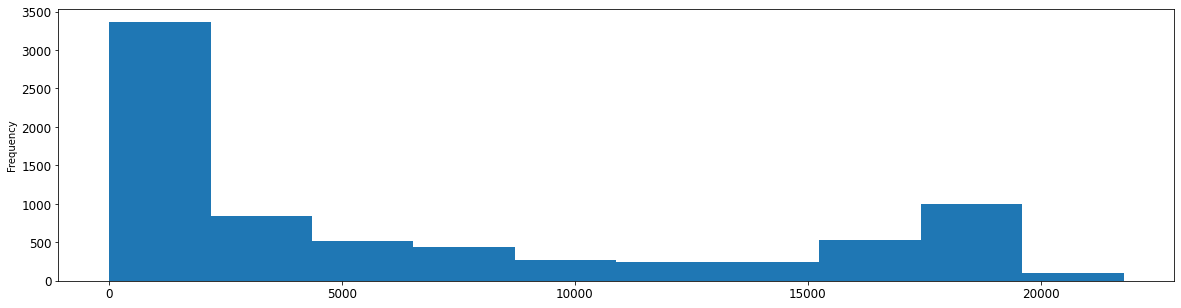

In [ ]:
# Weight Distribution is OK
print(data['Weight (kg)'].describe())
data['Weight (kg)'].plot.hist(figsize = [20, 5], fontsize = 12)

count    7548.000000
mean     2995.944812
std      1356.970816
min         0.000000
25%      2634.496128
50%      3390.887808
75%      3432.730752
max      4533.522048
Name: Total Distance (km), dtype: float64


<AxesSubplot:ylabel='Frequency'>

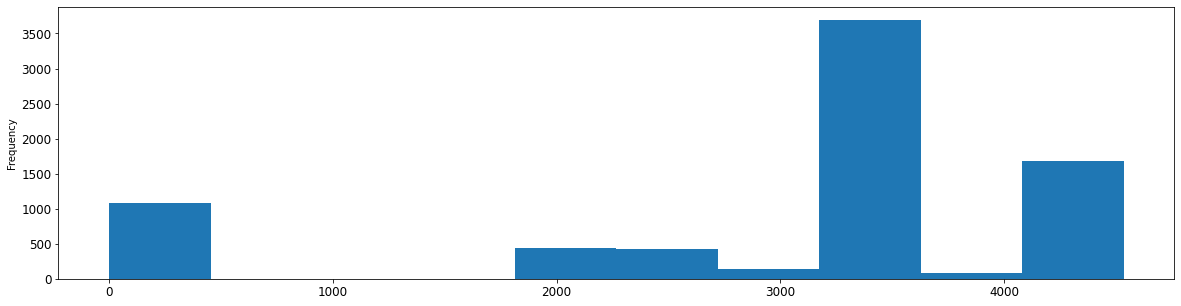

In [ ]:
# Distance Distribution not OK
print(data['Total Distance (km)'].describe())
data['Total Distance (km)'].plot.hist(figsize = [20, 5], fontsize = 12)

In [ ]:
# Zero Distances (not entered)
data[data['Total Distance (km)']==0]

,Tender Date,First Pick Calculated Date,First Pick Location City,Last Drop Calculated Date,Last Drop Location Name,Last Drop Location Reference Number,Last Drop Location City,Last Drop State/Province,Total Distance (km),Weight (kg),...,Last Drop Original Plan Date Start,Last Drop Appt Start Date,Fiscal Period - Primary Date,Load Group,Shipper Load Number,Pieces,Density (pcf),First Pick Location Reference Number,Volume (cu ft),PRO Number
Lean ID,,,,,,,,,,,,,,,,,,,,,
112280826,2020-07-23 14:25:00,2020-07-24 16:24:00,BOLTON,2020-07-31 09:30:00,COSTCO SW CALGARY,17484495,TSUU T'INA,AB,0.0,1466.609379,...,2020-07-31,2020-07-31 09:00:00,1970-01-01 00:00:00.000000008,ZA12-CUSTOMER,10175769,4,10.5238,490,307.24,59010552
113671150,2020-08-24 11:35:00,2020-08-25 11:11:00,BOLTON,2020-09-02 15:40:00,WALMART LOGISTICS 6063,10273243,CALGARY,AB,0.0,1583.150874,...,2020-09-01,2020-08-31 17:00:00,1970-01-01 00:00:00.000000009,ZA12-CUSTOMER,10177941,356,9.7436,490,358.21,4258293
113596276,2020-08-21 11:32:00,2020-08-25 13:31:00,BOLTON,2020-09-01 10:50:00,FED COOP - THE GROCERY PEOPLE LIMITED,10273157,EDMONTON,AB,0.0,326.105720,...,2020-09-01,2020-09-01 11:00:00,1970-01-01 00:00:00.000000009,ZA12-CUSTOMER,10177833,78,10.9963,490,65.38,59012315
113733719,2020-08-25 12:14:00,2020-08-26 14:13:00,BOLTON,2020-09-02 07:00:00,COSTCO WHOLESALE CANADA LTD. 1217,10406309,CALGARY,AB,0.0,17.263727,...,2020-09-02,2020-09-02 07:00:00,1970-01-01 00:00:00.000000009,ZA12-CUSTOMER,10178038,2,22.0000,490,1.73,59012434
113733701,2020-08-25 12:14:00,2020-08-26 14:13:00,BOLTON,2020-09-02 07:00:00,COSTCO WHOLESALE 543(CALGARY),10273140,CALGARY,AB,0.0,132.176825,...,2020-09-02,2020-09-02 06:30:00,1970-01-01 00:00:00.000000009,ZA12-CUSTOMER,10178036,17,25.9253,490,11.24,59012432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118830372,2020-12-15 11:28:00,2020-12-16 12:00:00,BOLTON,2020-12-22 10:17:00,LCL REGINA DISTRIBUTION CTR D034,10299673,REGINA,SK,0.0,2634.119929,...,2020-12-22,2020-12-22 23:59:00,1970-01-01 00:00:00.000000013,ZA12-CUSTOMER,10186156,670,17.3211,490,335.27,100002514254
118888173,2020-12-16 10:59:00,2020-12-17 12:00:00,BOLTON,2020-12-28 06:45:00,LCL REGINA DISTRIBUTION CTR D034,10299673,REGINA,SK,0.0,7315.515548,...,2020-12-23,2020-12-23 23:59:00,1970-01-01 00:00:00.000000013,ZA12-CUSTOMER,10186230,1074,7.4929,490,2152.44,100002516855
118953805,2020-12-17 11:43:00,2020-12-22 12:00:00,BOLTON,2021-01-03 00:09:00,LCL REGINA DISTRIBUTION CTR D034,10299673,REGINA,SK,0.0,2235.407673,...,2020-12-28,2020-12-28 23:59:00,1970-01-01 00:00:00.000000013,ZA12-CUSTOMER,10186358,481,14.0070,490,351.84,100002514409


In [ ]:
# Drop no necessary columns
data.drop(columns=['Last Drop Location Reference Number','Total Distance (km)','Fiscal Period - Primary Date','Load Group', 'Shipper Load Number', 'First Pick Location Reference Number', 'PRO Number'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


count                         7548
mean     1 days 20:18:41.081081081
std      6 days 01:22:01.354697766
min             -24 days +00:25:00
25%                1 days 01:59:00
50%                1 days 06:00:00
75%                2 days 02:55:15
max              367 days 00:30:00
dtype: object


<AxesSubplot:>

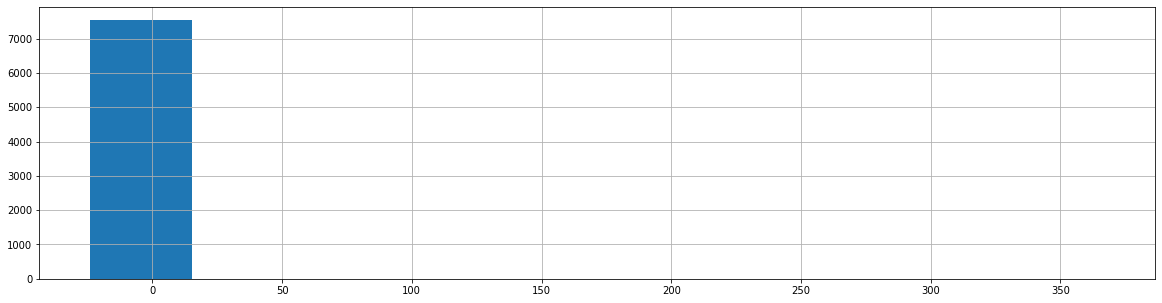

In [ ]:
# Duration between Tender and First Pick (Calculated) is not OK
print((data['First Pick Calculated Date'] - data['Tender Date']).describe())
(data['First Pick Calculated Date'] - data['Tender Date']).dt.days.hist(figsize = [20, 5])

count                         7548
mean     7 days 15:52:16.303656597
std      4 days 21:35:35.389807762
min            -360 days +12:24:00
25%                6 days 10:30:00
50%                7 days 07:30:00
75%                8 days 15:27:15
max               48 days 18:26:00
Name: Calculated Duration, dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:>

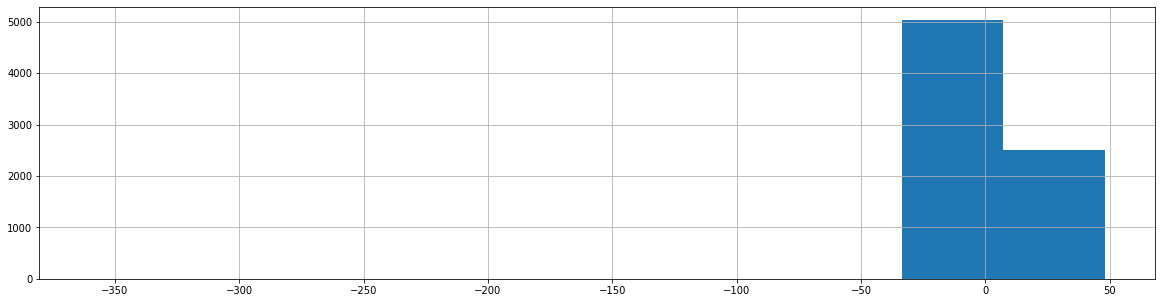

In [ ]:
# Calculated Duration between First Pick and Last Drop is not OK either
data['Calculated Duration'] = data['Last Drop Calculated Date'] - data['First Pick Calculated Date']
print(data['Calculated Duration'].describe())
data['Calculated Duration'].dt.days.hist(figsize = [20, 5])

In [ ]:
data[data['Calculated Duration']<'-359 days']

,Tender Date,First Pick Calculated Date,First Pick Location City,Last Drop Calculated Date,Last Drop Location Name,Last Drop Location City,Last Drop State/Province,Weight (kg),Number of Shipments,Pallets,...,Transportation Mode,First Pick Appt Start Date,First Pick Arrival Date,Last Drop Arrival Date,Last Drop Original Plan Date Start,Last Drop Appt Start Date,Pieces,Density (pcf),Volume (cu ft),Calculated Duration
Lean ID,,,,,,,,,,,,,,,,,,,,,
101586353,2019-11-13 12:06:00,2020-11-14 12:36:00,BOLTON,2019-11-21 01:00:00,COSTCO DEPOT AIRDRIE 1034,AIRDRIE,AB,17395.540695,1,36.0,...,IM,2019-11-14 12:00:00,2020-11-14 12:36:00,2019-11-21 01:00:00,2019-11-21,2019-11-21 01:00:00,36,21.0362,1823.08,-360 days +12:24:00


In [ ]:
# Easy Fix, change Tender Date by 1 year
data['Last Drop Calculated Date'] = data['Last Drop Calculated Date'].replace(data['Last Drop Calculated Date'].min(),'2020-11-21 01:00:00')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


count                         7548
mean     1 days 15:09:50.389507154
std      0 days 23:24:53.368736452
min              -6 days +06:19:00
25%                1 days 03:11:00
50%                1 days 04:55:00
75%                1 days 10:24:15
max                9 days 04:38:00
dtype: object


<AxesSubplot:>

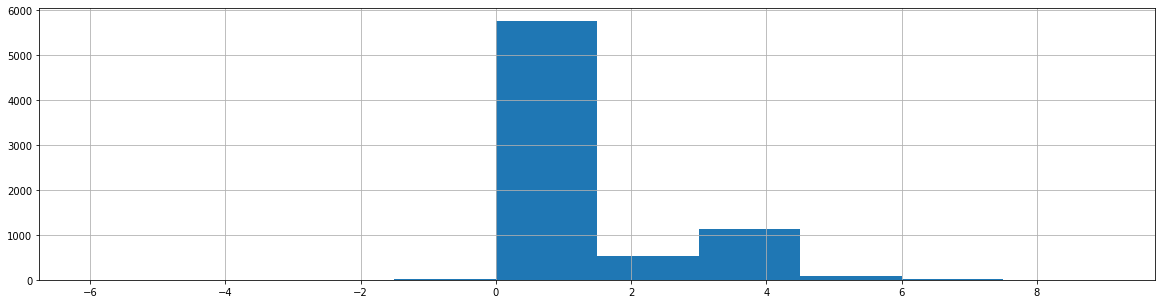

In [ ]:
# Duration between Tender and First Pick Appointment is not OK
print((data['First Pick Appt Start Date'] - data['Tender Date']).describe())
(data['First Pick Appt Start Date'] - data['Tender Date']).dt.days.hist(figsize = [20, 5])

count                           7548
mean     -1 days +18:51:09.308426074
std        6 days 00:00:39.279722451
min              -367 days +23:24:00
25%                -1 days +18:48:45
50%                  0 days 00:15:00
75%                  0 days 03:22:00
max                 24 days 21:00:00
dtype: object


<AxesSubplot:>

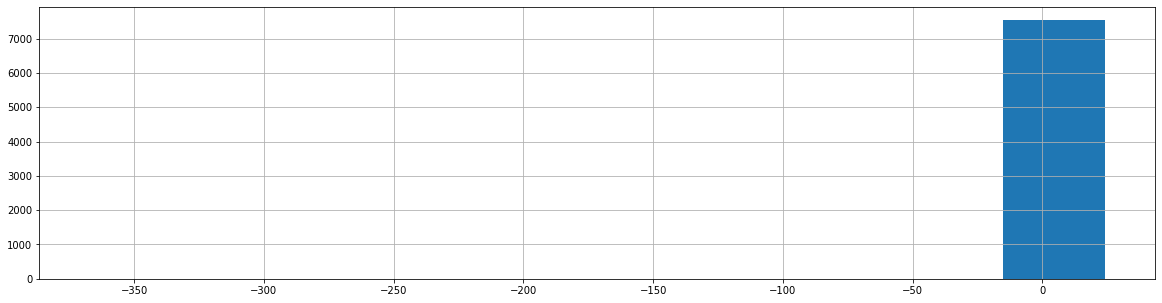

In [ ]:
# Duration between Calculate First Pick and First Pick Appointment is not OK
print((data['First Pick Appt Start Date'] - data['First Pick Calculated Date']).describe())
(data['First Pick Appt Start Date'] - data['First Pick Calculated Date']).dt.days.hist(figsize = [20, 5])

count                         7548
mean     0 days 05:08:50.691573926
std      6 days 00:00:39.279722451
min             -25 days +03:00:00
25%              -1 days +20:38:00
50%              -1 days +23:45:00
75%                0 days 05:11:15
max              366 days 00:36:00
dtype: object


<AxesSubplot:>

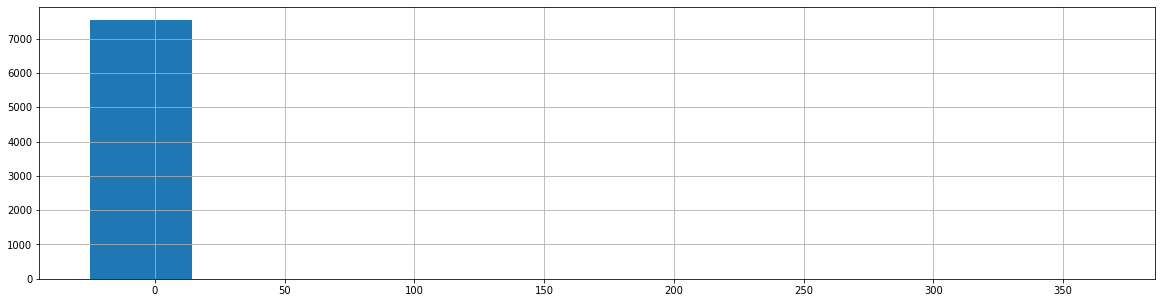

In [ ]:
# Duration between First Pick Appointment and First Pick Arrival is not OK
print((data['First Pick Arrival Date'] - data['First Pick Appt Start Date']).describe())
(data['First Pick Arrival Date'] - data['First Pick Appt Start Date']).dt.days.hist(figsize = [20, 5])

count                         7548
mean     0 days 22:37:28.076311605
std      4 days 16:33:26.553211386
min             -30 days +08:00:00
25%                0 days 06:00:00
50%                0 days 09:30:00
75%                0 days 21:41:15
max              365 days 22:32:00
dtype: object


<AxesSubplot:>

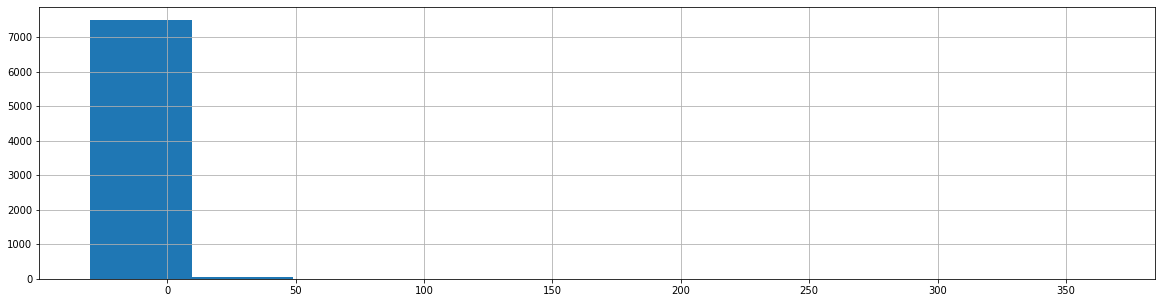

In [ ]:
# Duration between Last Drop Arrival and Last Drop Plan is not OK
print((data['Last Drop Arrival Date'] - data['Last Drop Original Plan Date Start']).describe())
(data['Last Drop Arrival Date'] - data['Last Drop Original Plan Date Start']).dt.days.hist(figsize = [20, 5])

In [ ]:
# Unique Cities
print(len(data['Last Drop Location City'].unique()))
data['Last Drop Location City'].value_counts().to_frame().transpose()

55


,CALGARY,ROCKY VIEW COUNTY,WINNIPEG,EDMONTON,AIRDRIE,REGINA,LANGLEY,DELTA,BURNABY,VANCOUVER,...,SPRUCE GROVE,DAWSON CREEK,QUESNEL,LEDUC,EDSON,OLDS,COLD LAKE,PEACE RIVER,LLOYDMINSTER,FORT SASKATCHEWAN
Last Drop Location City,1334,1259,556,538,508,489,488,388,212,203,...,1,1,1,1,1,1,1,1,1,1


<AxesSubplot:>

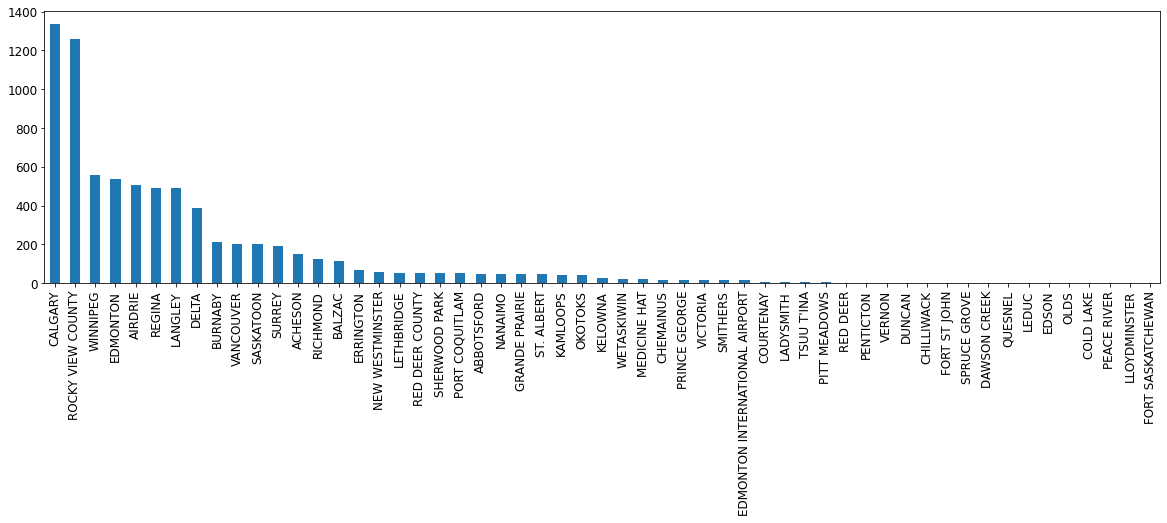

In [ ]:
data['Last Drop Location City'].value_counts().plot.bar(figsize = [20, 5], fontsize = 12)

In [ ]:
data[['Last Drop Location City', 'Last Drop State/Province', 'Calculated Duration']].groupby(by=['Last Drop State/Province','Last Drop Location City']).mean()

Calculated Duration
Last Drop State/Province Last Drop Location City                                  
AB                       ACHESON                            7 days 10:40:35.600000
                         AIRDRIE                         6 days 20:29:09.803149606
                         BALZAC                          9 days 15:43:14.210526315
                         CALGARY                         7 days 09:17:03.193403298
                         COLD LAKE                                 8 days 21:00:00
                         EDMONTON                        7 days 12:59:09.702602230
                         EDMONTON INTERNATIONAL AIRPORT  7 days 11:25:08.571428571
                         EDSON                                     7 days 15:48:00
                         FORT SASKATCHEWAN                         8 days 17:13:00
                         GRANDE PRAIRIE                            8 days 15:16:00
                         LEDUC                                     8 days 00:00:00
                         LETHBRIDGE                      7 days 16:08:19.615384615
                         LLOYDMINSTER                              9 days 06:58:00
                         MEDICINE HAT                    8 days 16:38:37.142857142
                         OKOTOKS                                   7 days 07:28:03
                         OLDS                                      9 days 06:35:00
                         PEACE RIVER                               9 days 02:55:00
                         RED DEER                                  8 days 18:08:00
                         RED DEER COUNTY                 8 days 14:34:41.176470588
                         ROCKY VIEW COUNTY               6 days 17:55:32.644956314
                         SHERWOOD PARK                      7 days 20:20:40.800000
                         SPRUCE GROVE                              8 days 19:35:00
                         ST. ALBERT                                7 days 04:27:30
                         TSUU T'INA                                8 days 04:27:00
                         WETASKIWIN                      8 days 09:46:51.818181818
BC                       ABBOTSFORD                      9 days 02:52:48.979591836
                         BURNABY                         9 days 03:41:56.320754717
                         CHEMAINUS                                 9 days 12:37:10
                         CHILLIWACK                               12 days 17:49:00
                         COURTENAY                                 9 days 14:54:15
                         DAWSON CREEK                             10 days 21:38:00
                         DELTA                           9 days 11:36:05.876288659
                         DUNCAN                                    8 days 01:00:00
                         ERRINGTON                       9 days 11:39:48.695652173
                         FORT ST JOHN                             10 days 23:45:00
                         KAMLOOPS                       10 days 07:03:05.581395348
                         KELOWNA                         8 days 19:52:15.555555555
                         LADYSMITH                                10 days 10:17:00
                         LANGLEY                         8 days 17:33:17.336065573
                         NANAIMO                                   8 days 17:05:15
                         NEW WESTMINSTER                 9 days 22:18:19.285714285
                         PENTICTON                                 8 days 12:59:30
                         PITT MEADOWS                              9 days 03:52:00
                         PORT COQUITLAM                            9 days 06:11:00
                         PRINCE GEORGE                   9 days 10:10:45.882352941
                         QUESNEL                                   7 days 16:00:00
                         RICHMOND                        9 days 23:50:39.193548

Rename Colums

In [ ]:
# data.rename(columns={'Old Name':'New Name', '':'', inplace=True)

In [ ]:
# Transportation Modes Counts
data['Transportation Mode'].value_counts().to_frame().transpose()

,LTL,IM,TL
Transportation Mode,5283,1817,448


In [ ]:
# Equipment Description Counts
data['Equipment Description'].value_counts().to_frame()

,Equipment Description
53 DRY - LTL IM,2399
53 REEFER-LTL,1219
53 HEATED - LTL IM,1093
40 DRY CONTAINER,971
53 HEATED-LTL,421
53 DRY-IM,361
53 REEFER-IM,312
53 DRY-TL,206
53 REEFER-TL,189
53 HEATED-IM,173


In [ ]:
# Transportation Equipment Usage
data[['Transportation Mode','Temperature Class', 'Equipment Description']].groupby(by=['Transportation Mode','Temperature Class','Equipment Description']).count()

Empty DataFrame
Columns: []
Index: [(IM, DRY, 40 DRY CONTAINER), (IM, DRY, 53 DRY-IM), (IM, HEAT, 53 HEATED-IM), (IM, REFRIGERATED, 53 REEFER-IM), (LTL, DRY, 53 DRY - LTL IM), (LTL, DRY, 53 DRY-LTL), (LTL, HEAT, 53 HEATED - LTL IM), (LTL, HEAT, 53 HEATED-LTL), (LTL, REFRIGERATED, 53 REEFER - LTL IM), (LTL, REFRIGERATED, 53 REEFER-LTL), (TL, DRY, 53 DRY-TL), (TL, HEAT, 53 HEATED-TL), (TL, REFRIGERATED, 53 REEFER-TL)]

count    7548.000000
mean       15.296337
std        15.627452
min         0.010000
25%         1.160000
50%         8.420000
75%        31.035000
max        53.940000
Name: Pallets, dtype: float64


<AxesSubplot:ylabel='Frequency'>

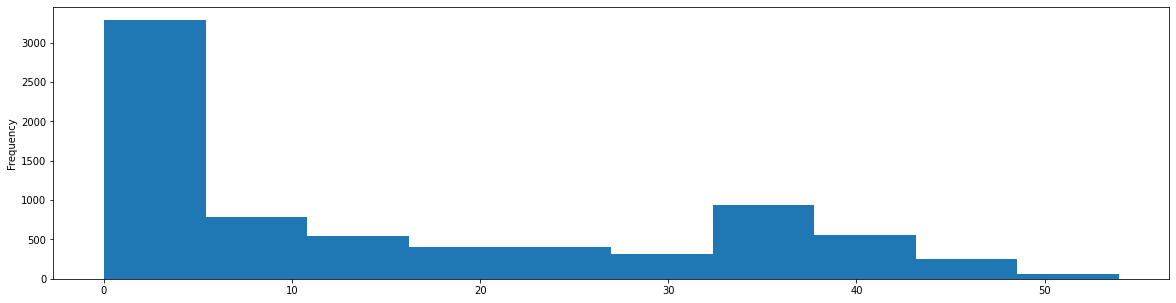

In [ ]:
# Distribution of Pallets is OK
print(data['Pallets'].describe())
data['Pallets'].plot.hist(figsize = [20, 5])

count    7548.000000
mean      811.952703
std      1028.769703
min         1.000000
25%        26.000000
50%       292.000000
75%      1384.000000
max      8497.000000
Name: Pieces, dtype: float64


<AxesSubplot:ylabel='Frequency'>

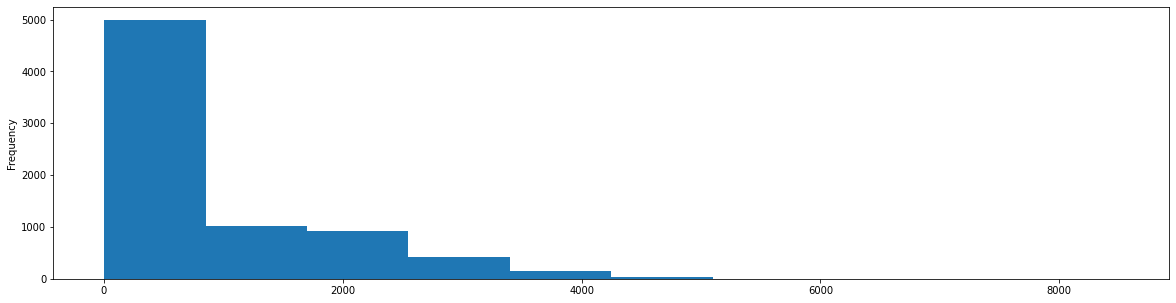

In [ ]:
# Distribution of Pieces is OK
print(data['Pieces'].describe())
data['Pieces'].plot.hist(figsize = [20, 5])

In [ ]:
# Why so many pieces coming to Walmart?
data[data['Pieces']==8497]

,Tender Date,First Pick Calculated Date,First Pick Location City,Last Drop Calculated Date,Last Drop Location Name,Last Drop Location City,Last Drop State/Province,Weight (kg),Number of Shipments,Pallets,...,Transportation Mode,First Pick Appt Start Date,First Pick Arrival Date,Last Drop Arrival Date,Last Drop Original Plan Date Start,Last Drop Appt Start Date,Pieces,Density (pcf),Volume (cu ft),Calculated Duration
Lean ID,,,,,,,,,,,,,,,,,,,,,
107047570,2020-03-23 14:43:00,2020-03-24 02:24:00,BOLTON,2020-03-31 05:10:00,WALMART LOGISTICS 6063,CALGARY,AB,19118.225664,4,53.12,...,IM,2020-03-24 12:00:00,2020-03-24 02:24:00,2020-03-31 05:10:00,2020-03-31,2020-03-31 05:30:00,8497,20.0661,2100.48,7 days 02:46:00


<AxesSubplot:title={'center':'Pallets'}, xlabel='Transportation Mode'>

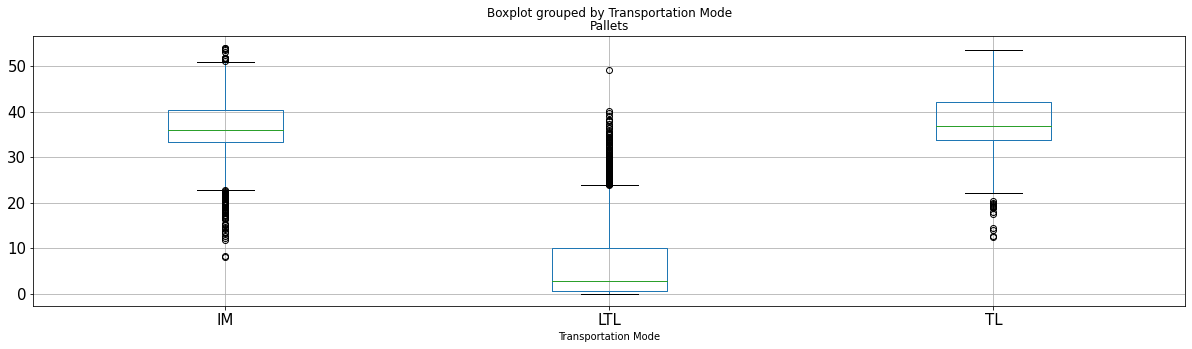

In [ ]:
# Pallets by Transportation Mode make sense
data.boxplot('Pallets','Transportation Mode', figsize = [20, 5], fontsize = 15)

<AxesSubplot:title={'center':'Pieces'}, xlabel='Transportation Mode'>

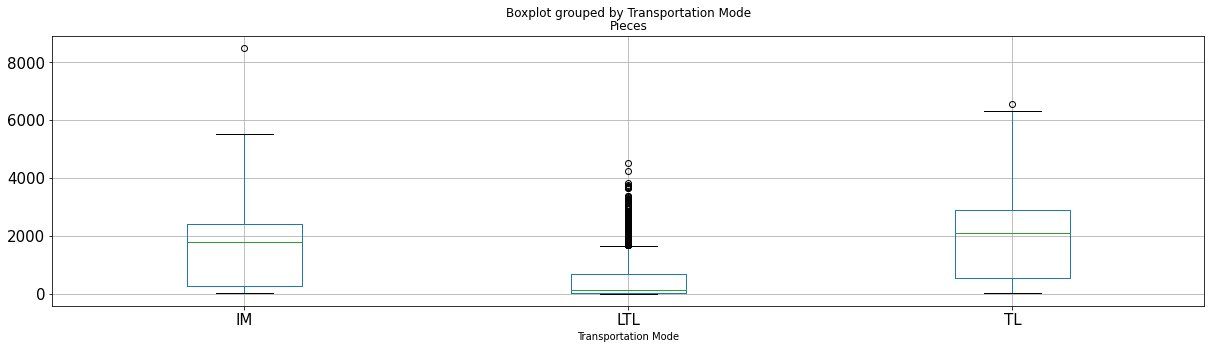

In [ ]:
# Pieces by Transportation Mode make sense
data.boxplot('Pieces','Transportation Mode', figsize = [20, 5], fontsize = 15)

<AxesSubplot:xlabel='Volume (cu ft)', ylabel='Density (pcf)'>

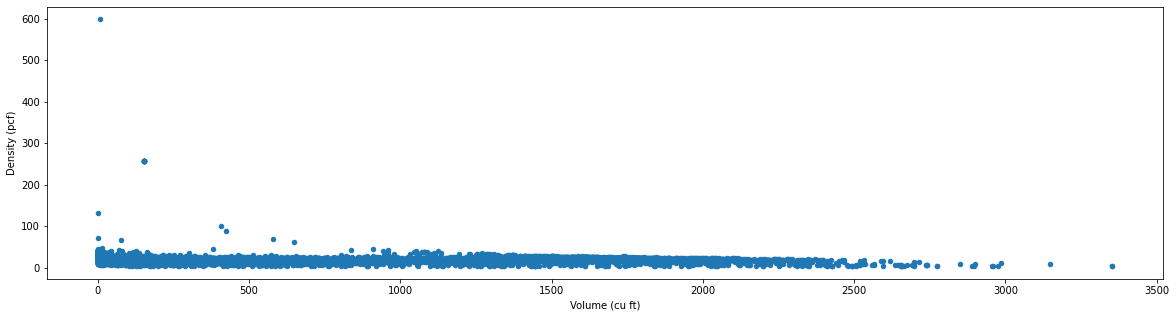

In [ ]:
data.plot.scatter('Volume (cu ft)','Density (pcf)', figsize = [20, 5])

count    7548.000000
mean       19.648645
std        12.467888
min         2.866300
25%        15.853275
50%        19.725950
75%        22.708475
max       598.672200
Name: Density (pcf), dtype: float64


<AxesSubplot:ylabel='Frequency'>

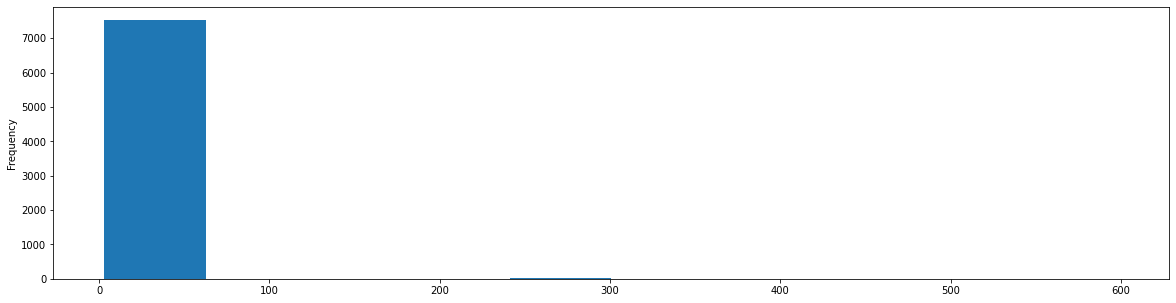

In [ ]:
# Density Distribution doesn't look right
print(data['Density (pcf)'].describe())
data['Density (pcf)'].plot.hist(figsize = [20, 5])

In [ ]:
# Why so heavy?
data[data['Density (pcf)']>500]

,Tender Date,First Pick Calculated Date,First Pick Location City,Last Drop Calculated Date,Last Drop Location Name,Last Drop Location City,Last Drop State/Province,Weight (kg),Number of Shipments,Pallets,...,Transportation Mode,First Pick Appt Start Date,First Pick Arrival Date,Last Drop Arrival Date,Last Drop Original Plan Date Start,Last Drop Appt Start Date,Pieces,Density (pcf),Volume (cu ft),Calculated Duration
Lean ID,,,,,,,,,,,,,,,,,,,,,
108596856,2020-04-30 11:34:00,2020-05-01 10:40:00,BOLTON,2020-05-08 10:00:00,WALMART LOGISTICS 6063,CALGARY,AB,2128.976753,2,7.4,...,LTL,2020-05-01 18:00:00,2020-05-01 10:40:00,2020-05-08 10:00:00,2020-05-08,2020-05-08 10:00:00,222,598.6722,7.84,6 days 23:20:00


<AxesSubplot:xlabel='Pieces', ylabel='Pallets'>

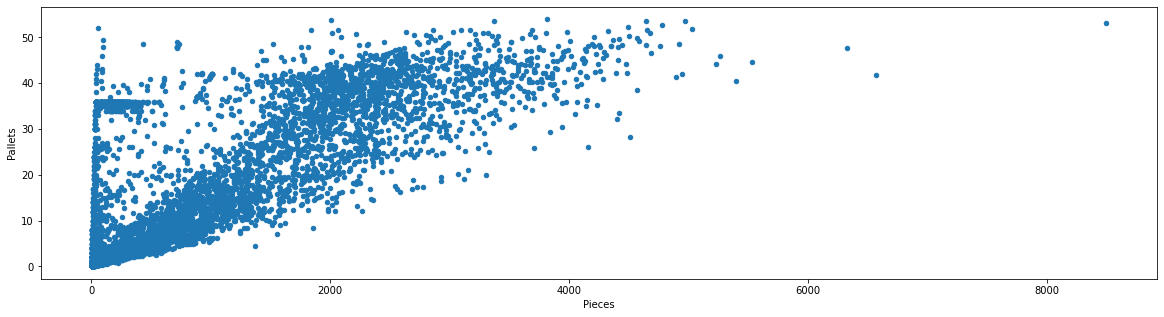

In [ ]:
# Correlation between Pieces and Pallets is OK
data.plot.scatter('Pieces','Pallets', figsize = [20, 5])

<AxesSubplot:xlabel='Weight (kg)', ylabel='Pallets'>

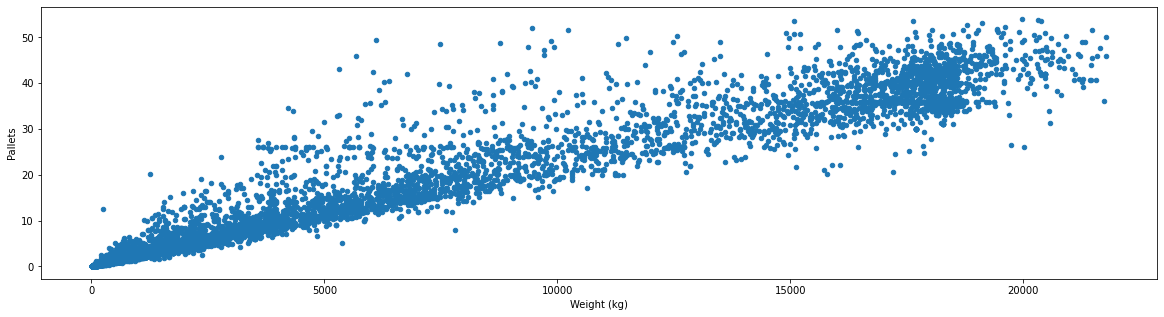

In [ ]:
# Correlation between Weight and Pallets is OK
data.plot.scatter('Weight (kg)','Pallets', figsize = [20, 5])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<AxesSubplot:xlabel='Weight (lb)', ylabel='Weight (kg)'>

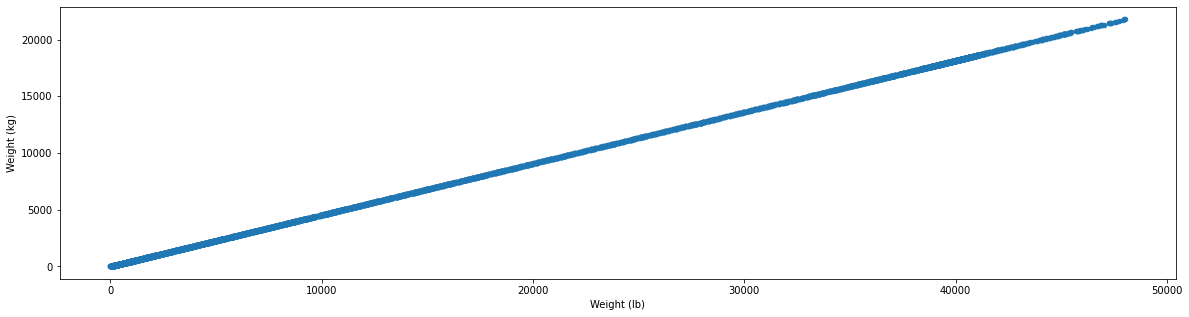

In [ ]:
# Calculate Weith in Pounds and check perfect correlation to Kilos
data['Weight (lb)'] = data['Density (pcf)'] * data['Volume (cu ft)']
data.plot.scatter('Weight (lb)','Weight (kg)', figsize = [20, 5])

In [ ]:
# Drop either repeated column
data.drop(columns=['Weight (lb)'], inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# Save the clean dataset to an Excel Spreadsheet
data.to_excel('3PL_Clean_Data.xlsx', sheet_name='3PL')
!cp 3PL_Clean_Data.xlsx "/content/drive/My Drive/Colab Data/"

## Geo Location Data for OSM

In [ ]:
# Install necessary Libraries, uncomment if required
!pip install geopandas
!pip install folium
!pip install osmnx
!pip install pygeos
import folium # map rendering library
from folium import plugins
import geopandas as gpd
from geopy.geocoders import Nominatim
from shapely.geometry import LineString, Point
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [ ]:
# Convert an address/city into latitude and longitude values / Input Origin
address = input('Enter Adress/City, Province/State and/or Country: ')

geolocator = Nominatim(user_agent="Canada_explore")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of {} are {}, {}.'.format(address, latitude, longitude))

Enter Adress/City, Province/State and/or Country: Bolton, ON
The geograpical coordinate of Bolton, ON are 43.879548, -79.73826.


In [ ]:
# Create a new Dataframe for Unique Cities
cities = data[['Last Drop Location City','Last Drop State/Province']].groupby(['Last Drop Location City','Last Drop State/Province']).count().reset_index()

In [ ]:
# Geo locate Cities
destinations = gpd.GeoDataFrame(columns = ['name', 'geometry'], crs = 4326, geometry = 'geometry')
geolocator = Nominatim(user_agent="Canada_explorer")
Lat = []
Lon = []

for i in range(len(cities)):
  location = geolocator.geocode(cities['Last Drop Location City'][i]+', '+cities['Last Drop State/Province'][i])
  print('The geograpical coordinate of {} is {}, {}.'.format(cities['Last Drop Location City'][i], location.latitude, location.longitude))
  destinations.at[i, 'geometry'] = Point(location.longitude, location.latitude)
  destinations.at[i, 'name'] = cities['Last Drop Location City'][i]
  Lat.append(location.latitude)
  Lon.append(location.longitude)

cities['Latitude'] = Lat
cities['Longitude'] = Lon

The geograpical coordinate of ABBOTSFORD is 49.0521162, -122.329479.
The geograpical coordinate of ACHESON is 53.5459141, -113.7715761.
The geograpical coordinate of AIRDRIE is 51.28597, -114.01062.
The geograpical coordinate of BALZAC is 51.2156111, -114.0045579.
The geograpical coordinate of BURNABY is 49.2433804, -122.9725459.
The geograpical coordinate of CALGARY is 51.0460954, -114.065465.
The geograpical coordinate of CHEMAINUS is 48.922499, -123.718414.
The geograpical coordinate of CHILLIWACK is 49.157677, -121.9514307.
The geograpical coordinate of COLD LAKE is 54.46046, -110.192871.
The geograpical coordinate of COURTENAY is 49.6894061, -124.9954959.
The geograpical coordinate of DAWSON CREEK is 55.7605306, -120.2364453.
The geograpical coordinate of DELTA is 49.0846258, -123.0579384.
The geograpical coordinate of DUNCAN is 48.7786872, -123.7080446.
The geograpical coordinate of EDMONTON is 53.535411, -113.507996.
The geograpical coordinate of EDMONTON INTERNATIONAL AIRPORT i

In [ ]:
cities

,Last Drop Location City,Last Drop State/Province,Latitude,Longitude
0,ABBOTSFORD,BC,49.052116,-122.329479
1,ACHESON,AB,53.545914,-113.771576
2,AIRDRIE,AB,51.285970,-114.010620
3,BALZAC,AB,51.215611,-114.004558
4,BURNABY,BC,49.243380,-122.972546
5,CALGARY,AB,51.046095,-114.065465
6,CHEMAINUS,BC,48.922499,-123.718414
7,CHILLIWACK,BC,49.157677,-121.951431
8,COLD LAKE,AB,54.460460,-110.192871
9,COURTENAY,BC,49.689406,-124.995496


## Save the clean dataset to an Excel Spreadsheet

In [ ]:
# Save the clean dataset to an Excel Spreadsheet
cities.to_excel('Cities_Data.xlsx', sheet_name='Cities')
!cp Cities_Data.xlsx "/content/drive/My Drive/Colab Data/"

In [ ]:
# Create the Origin Point
origin = gpd.GeoDataFrame(columns = ['name', 'geometry'], crs = 4326, geometry = 'geometry')
origin.at[0, 'geometry'] = Point(-79.73826, 43.879548)
origin.at[0, 'name'] = 'Bolton'
origin

,name,geometry
0,Bolton,POINT (-79.73826 43.87955)


         name                     geometry
0  ABBOTSFORD  POINT (-122.32948 49.05212)
1     ACHESON  POINT (-113.77158 53.54591)
2     AIRDRIE  POINT (-114.01062 51.28597)
3      BALZAC  POINT (-114.00456 51.21561)
4     BURNABY  POINT (-122.97255 49.24338)


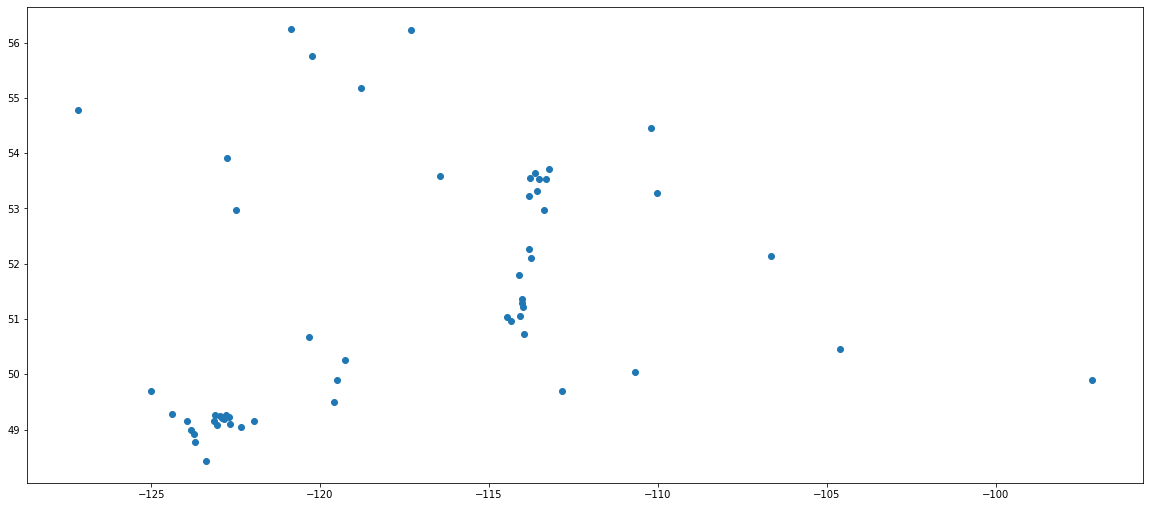

In [ ]:
# Destination created above (Print & Plot)
print(destinations.head())
destinations.plot(figsize=(20,50));

In [ ]:
# create a Canada map using latitude and longitude values from destinations
map_canada = folium.Map(location=[54, -110], zoom_start=6)

# add markers to map
for lat, lon, City in zip(cities['Latitude'], cities['Longitude'],cities['Last Drop Location City']):
    label = '{}'.format(City)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=1,
        popup=label,
        color='blue',
        fill=False,
        fill_opacity = 0.2,
        parse_html=False).add_to(map_canada)  
 
map_canada

### OpenStreetMaps Helper Functions

In [ ]:
# Function that gives back the shortest path (It can have many origins and destinations)

def shortest_path(origin, destination, network = 'drive'):
    '''origin and destination <geodataframe> crs 4326, network <str> drive, bike, walk
    return shortest path <GeoDataFrame>
    '''
    
    # creating a frame for fetching OSM data
    combined = origin.append(destination)
    
    convex = combined.unary_union.convex_hull
    
    graph_extent = convex.buffer(0.02)
    
    # fetching graph
    graph = ox.graph_from_polygon(graph_extent, network_type= network)
    
    # Reproject the graph
    graph_proj = ox.project_graph(graph)
    
    # Get the GeoDataFrame
    edges = ox.graph_to_gdfs(graph_proj, nodes=False)
    
    # Get CRS info UTM
    CRS = edges.crs
    
    # Reproject all data
    origin_proj = origin.to_crs(crs=CRS)
    destination_proj = destination.to_crs(crs=CRS)
    
    # routes of shortest path
    routes = gpd.GeoDataFrame()
    
    # Get nodes from the graph
    nodes = ox.graph_to_gdfs(graph_proj, edges=False)
    
    # Iterate over origins and destinations
    for oidx, orig in origin_proj.iterrows():
        
        # Find closest node from the graph --> point = (latitude, longitude)
        closest_origin_node = ox.get_nearest_node(G=graph_proj, point=(orig.geometry.y, orig.geometry.x), method='euclidean')
        
        # Iterate over targets
        for tidx, target in destination_proj.iterrows():
            
            # Find closest node from the graph --> point = (latitude, longitude)
            closest_target_node = ox.get_nearest_node(graph_proj, point=(target.geometry.y, target.geometry.x), method='euclidean')

            # Check if origin and target nodes are the same --> if they are --> skip
            if closest_origin_node == closest_target_node:
                print("Same origin and destination node. Skipping ..")
                continue
            
            # Find the shortest path between the points
            route = nx.shortest_path(graph_proj, 
                                     source=closest_origin_node, 
                                     target=closest_target_node, weight='length')
        
            # Extract the nodes of the route
            route_nodes = nodes.loc[route]
        
            # Create a LineString out of the route
            path = LineString(list(route_nodes.geometry.values))
        
            # Append the result into the GeoDataFrame
            routes = routes.append([[path]], ignore_index=True)

    # Add a column name
    routes.columns = ['geometry']        

    # Set geometry
    routes = routes.set_geometry('geometry')
    
    # Set coordinate reference system
    routes.crs = nodes.crs
    
    return routes

In [ ]:
routes = shortest_path(origin, destinations.head())

In [ ]:
routes.plot(figsize=(10,20))

### Cluster Locations by Geographical Region

In [ ]:
# one hot encoding
# onehotregion = pd.get_dummies(data[['Type']], prefix="", prefix_sep="")
# add back estimated Start Coordinates
# onehotregion['Latitude'] = data['Latitude']
# onehotregion['Longitude'] = data['Longitude']
# print(onehotregion.shape)
# onehotregion.head()

In [ ]:
# set number of clusters
# kclusters = 10

# run k-means clustering
# kmeans = KMeans(init = "k-means++", n_clusters=kclusters, random_state=123).fit(onehotregion)

# check how many cluster labels were generated for each row in the dataframe
# len(kmeans.labels_)

In [ ]:
# add Region labels
# onehotregion.insert(0, 'Region', kmeans.labels_)
# onehotregion.head()

### Feature Engineering

> Indented block

